<style>
  h1, h2, h3 {
    margin-top: 5px;
    margin-bottom: 5px;
  }

  .center-container {
    height: 50px;
    display: flex;
    align-items: center;
  }

  .center-container > div {
    flex: 1;
    display: flex;
    align-items: center;
  }
</style>

<h1 style="font-weight:bold;">
  <i style="color:#ff2c2c;">Heart Disease Classification</i>
  <span>
    <img
      style="height:24px;"
      src="https://uxwing.com/wp-content/themes/uxwing/download/relationship-love/heart-flat-icon.png"/>
  </span>
</h1>

<div class="center-container" style="width:460px;">
  <div>
    <h1 style="font-weight:bold;">
      by <span><a style="color:#00a0dc" href="https://www.linkedin.com/in/novalalthoff/">Noval Althoff</a></span>
    </h1>
  </div>
  <div>
    <a
      style="margin-top:3px;"
      href="https://www.linkedin.com/in/novalalthoff/" 
      target="_parent">
      <img
        style="border-radius:10px; border:2px;"
        src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"
        alt="LinkedIn Profile"
      />
    </a>
  </div>
</div>

<h3>
  Dataset Source:
  <a href="https://archive.ics.uci.edu/dataset/45/heart+disease">
    <b>UCI Heart Disease (Cleveland) - 1988</b>
  </a>
</h3>

<div class="center-container" style="width:300px; margin-top:20px;">
  <div>
    <b>Open Github Repository:</b>
  </div>
  <div>
    <a
      style="margin-top:3px;"
      href="https://github.com/novalalthoff" 
      target="_parent">
      <img
        style="border-radius:10px; border:2px;"
        src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white"
        alt="Open Github Repository"
      />
    </a>
  </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

<style>
  ul > li {
    margin-bottom: 10px;
  }
</style>

<h3>
  Open dataset information in
  <span style="font-weight:bold;"><a href="source/heart-disease.names">heart-disease.names</a></span>
</h3>

<div style="margin-top:20px;">
  <h4 style="margin-bottom:12px;">
    <b>Vital informations</b> about the dataset:
  </h4>
  <ul style="margin-right:50px;">
    <li>
      This database contains <b>76 attributes</b>, but all published experiments refer to using a subset of <b>14</b> of them.
    </li>
    <li>
      In particular, the Cleveland database is the only one that has been used by ML researchers to this date.
    </li>
    <li>
      The "<b><i>goal</i></b>" field refers to the presence of heart disease in the patient. It is integer valued from <b>0 (no presence) to 4</b>.
    </li>
    <li>
      Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).
    </li>
    <li>
      <b>Missing Attribute</b> Values: Several. Distinguished with value <b>-9.0</b>.
    </li>
  </ul>

  <h4 style="margin-bottom:6px; color:#d9534f;">
    <b>WARNING</b>
  </h4>
  <p style="margin:0px 50px 0px 40px;">
    The file <b style="color:#5bc0de">cleveland.data</b> has been unfortunately <b style="color:#d9534f;">messed up</b> when we lost node cip2 and loaded the file on node ics.  The file <b style="color:#5bc0de">processed.cleveland.data</b> <b style="color:#5cb85c;">seems to be in good shape</b> and is useable (for the 14 attributes situation).
  </p>
</div>

In [2]:
# Because of the warning, we will use processed.cleveland.data instead of cleveland.data as the dataset source
# Get all rows of data and put it into pandas dataframe
df = pd.read_csv("source/processed.cleveland.data", header=None)

print("UCI Heart Disease Cleveland Database:")
print("Total rows: {}".format(df.shape[0]))
print("Total columns: {}".format(df.shape[1]))
df.head()

UCI Heart Disease Cleveland Database:
Total rows: 303
Total columns: 14


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<style>
  ol > li {
    margin-bottom: 5px;
  }
  li > span{
    margin-left: 10px
  }
</style>

<div>
  <h4 style="margin-bottom:5px;">
    <b>Attribute Information</b>:
  </h4>
  <p style="margin:0px 0px 10px 10px;"><i>(Only 14 used)</i></p>
  <ol style="margin:0px 50px 0px 0px;" type="1">
    <li><span>#3 (<b>age</b>)</span></li>
    <li><span>#4 (<b>sex</b>)</span></li>
    <li><span>#9 (<b>cp</b>)</span></li>
    <li><span>#10 (<b>trestbps</b>)</span></li>
    <li><span>#12 (<b>chol</b>)</span></li>
    <li><span>#16 (<b>fbs</b>)</span></li>
    <li><span>#19 (<b>restecg</b>)</span></li>
    <li><span>#32 (<b>thalach</b>)</span></li>
    <li><span>#38 (<b>exang</b>)</span></li>
    <li><span>#40 (<b>oldpeak</b>)</span></li>
    <li><span>#41 (<b>slope</b>)</span></li>
    <li><span>#44 (<b>ca</b>)</span></li>
    <li><span>#51 (<b>thal</b>)</span></li>
    <li><span>#58 (<b>num</b>) - <b><i>the predicted attribute</i></b></span></li>
  </ol>
</div>

In [3]:
# Naming each attribute
column_mapping = {
  0: 'age',
  1: 'sex',
  2: 'cp',
  3: 'trestbps',
  4: 'chol',
  5: 'fbs',
  6: 'restecg',
  7: 'thalach',
  8: 'exang',
  9: 'oldpeak',
  10: 'slope',
  11: 'ca',
  12: 'thal',
  13: 'target'
}

df = df.rename(columns=column_mapping)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Check which column has '?' as records
print("Columns which has '?' as records:")

i = 0
j = 0
for column in df.columns:
  null_counts = df[column].loc[df[column].astype(str) == "?"].count()
  if null_counts > 0:
    print("{}  ->  {}".format(column, null_counts))
    j += 1
  i += 1
  if i == (len(df.columns) - 1) and j == 0:
    print("None")

Columns which has '?' as records:
ca  ->  4
thal  ->  2


In [5]:
# Replacing '?' with NaN to detect null values
df.replace('?', pd.NA, inplace=True)

# Call rows with null values
df.loc[df['ca'].isnull() | df['thal'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,<NA>,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,<NA>,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,<NA>,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,<NA>,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,<NA>,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,<NA>,3.0,0


In [6]:
# Show target class distribution
df['target'].value_counts().sort_index()

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

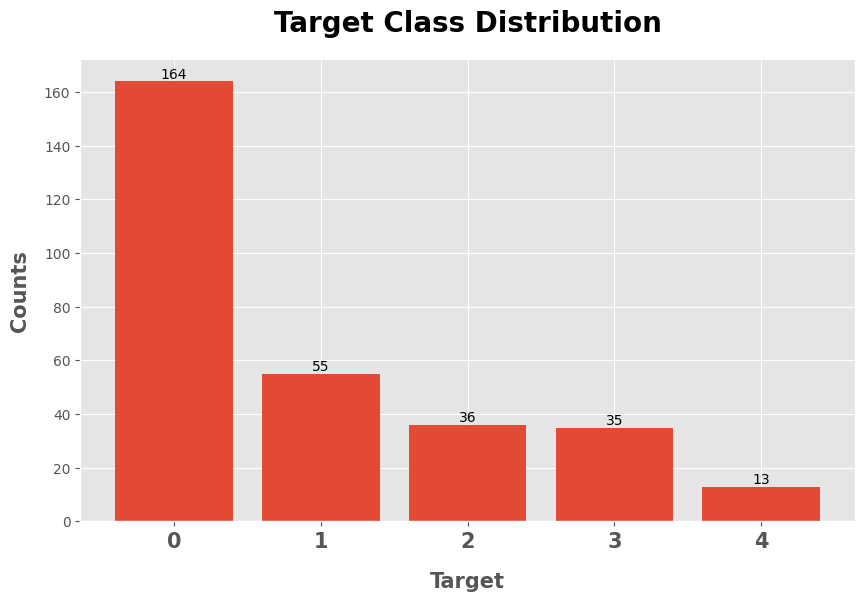

In [7]:
# Visualize target class distribution
plt.figure(figsize=(10, 6))

bars = plt.bar(df['target'].sort_values().unique(), df['target'].value_counts())
plt.title("Target Class Distribution", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Target", fontsize=15, fontweight='bold', labelpad=15)
plt.ylabel("Counts", fontsize=15, fontweight='bold', labelpad=10)
plt.xticks(fontsize=15, fontweight='bold')

for bar in bars:
  y_val = bar.get_height()
  plt.text((bar.get_x() + (bar.get_width() / 2)), y_val, round(y_val, 2), ha='center', va='bottom')

plt.show()

In [8]:
# Because nulled-row-counts insignificant for each target, we will drop these rows
print("Rows before null-dropping: {}".format(df.shape[0]))
df.dropna(inplace=True)
print("Rows after null-dropping: {}".format(df.shape[0]))

# Check which column has null values
print("\nRe-checking columns with null values:")

i = 0
j = 0
for column in df.columns:
  null_counts = df[column].isnull().sum()
  if null_counts > 0:
    print("{}  ->  {}".format(column, null_counts))
    j += 1
  i += 1
  if i == (len(df.columns) - 1) and j == 0:
    print("None")

Rows before null-dropping: 303
Rows after null-dropping: 297

Re-checking columns with null values:
None


In [9]:
# Check duplicated rows
print("Duplicated row counts:")
print(df.duplicated().sum())

Duplicated row counts:
0


In [10]:
# Show recent dataframe complete info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [11]:
# Change remaining string-typed attributes into float
for column in df.columns:
  if df[column].dtypes == 'O':
    df[column] = df[column].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [12]:
# (OPTIONAL)
# Export data into CSV for future use
df.to_csv(
  "app/csv/cleveland.csv",
  encoding='utf-8',
  index=False,
  header=True
)

print("Data Successfully Exported to CSV!")

Data Successfully Exported to CSV!


In [13]:
from imblearn.over_sampling import SMOTE

# Separate features and target class
X = df.drop("target", axis=1)
y = df['target'].astype(int)

# Oversampling the data using SMOTE
# Why oversampling?
# Because the highest target count is only 155
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts()

target
0    160
2    160
1    160
3    160
4    160
Name: count, dtype: int64

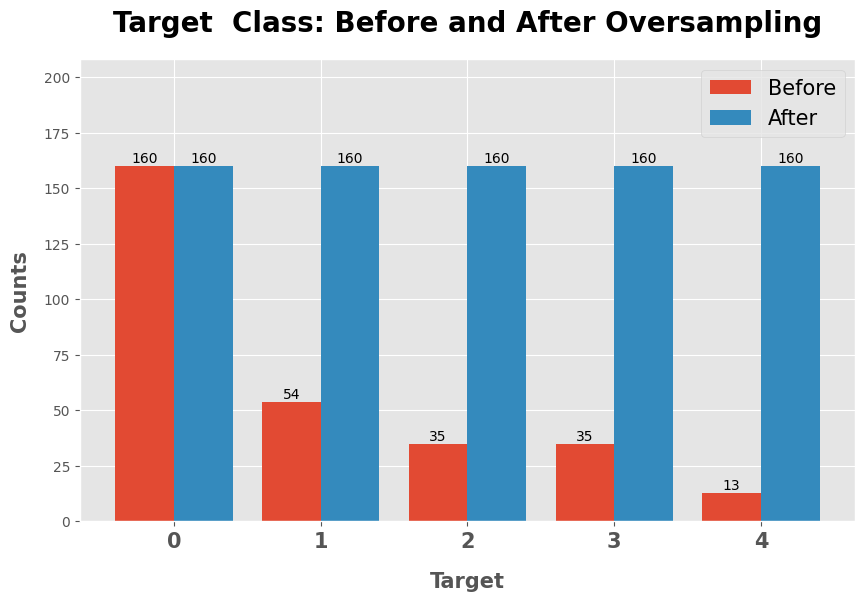

In [14]:
# Visualize target class distribution
# Compate between before and after data-sampling 
plt.figure(figsize=(10, 6))

r = np.arange(5)
width = 0.4

plot_data = {
  'data': [y.value_counts().to_list(), y_resampled.value_counts().to_list()],
  'label': ["Before", "After"],
  'bar': [(r - (width / 2)), (r + (width / 2))]
}

for i in range(len(plot_data['data'])):
  bars = plt.bar(plot_data['bar'][i], plot_data['data'][i], width=width, label=plot_data['label'][i])
  for bar in bars:
    y_val = bar.get_height()
    plt.text((bar.get_x() + (bar.get_width() / 2)), y_val, round(y_val, 2), ha='center', va='bottom')

plt.xticks(r, y.sort_values().unique(), fontsize=15, fontweight='bold')
plt.title("Target  Class: Before and After Oversampling", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Target", fontsize=15, fontweight='bold', labelpad=15)
plt.ylabel("Counts", fontsize=15, fontweight='bold', labelpad=10)
max_value = y_resampled.value_counts().max()
plt.ylim(ymax=(max_value + (max_value * 30 / 100)))
plt.legend(fontsize=15)

plt.show()

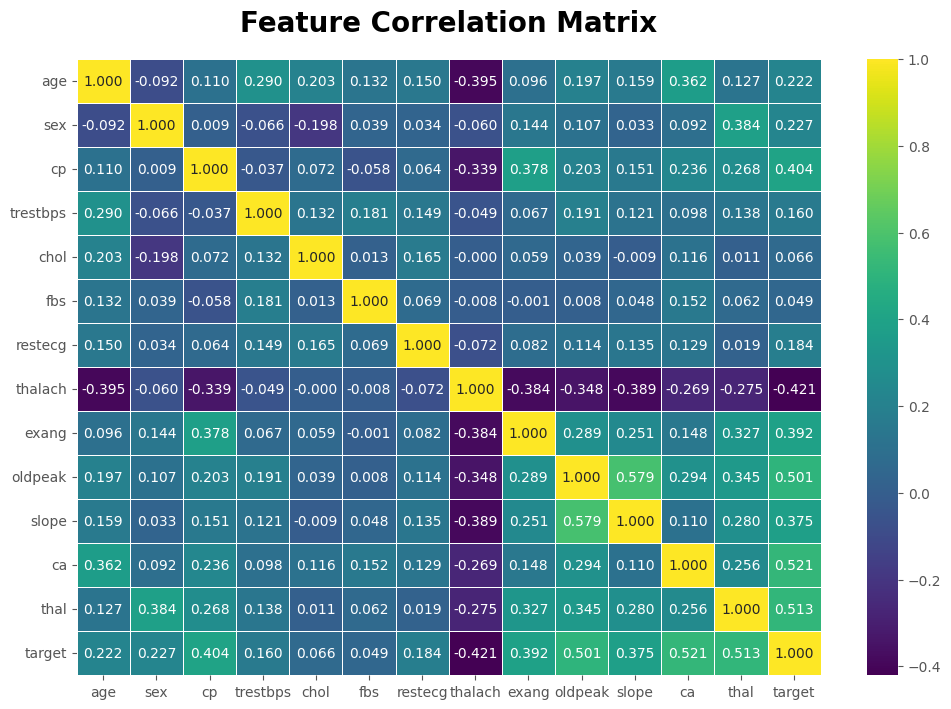

In [15]:
# Show correlation matrix between attributes
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".3f", cmap='viridis')
plt.title("Feature Correlation Matrix", fontsize=20, fontweight='bold', pad=20)

plt.show()

In [16]:
# Make a new dataframe with resampled-data
df_resampled = pd.DataFrame(data=X_resampled)
df_resampled['target'] = y_resampled

df_resampled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [17]:
# Describe the data for each feature
df_resampled.iloc[:, :-1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,56.218596,0.773533,3.490353,133.662448,246.855473,0.133487,1.159957,141.920798,0.459351,1.542685,1.801835,1.061630,5.558515
std,8.041851,0.381606,0.797714,15.765794,49.252623,0.300197,0.865989,20.555029,0.440999,1.158121,0.533962,0.970618,1.705364
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,51.000000,0.633350,3.000000,122.195942,211.000000,0.000000,0.000000,127.287265,0.000000,0.600000,1.232626,0.000000,3.232689
50%,57.325944,1.000000,4.000000,132.000000,243.037020,0.000000,1.523307,142.157130,0.364658,1.443153,2.000000,1.000000,6.576256
75%,61.877932,1.000000,4.000000,143.534641,282.000000,0.000000,2.000000,157.845052,1.000000,2.353993,2.000000,1.945641,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features to level the standard deviation
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Put into a new dataframe variable
df_resampled_scaled = pd.DataFrame(columns=df.columns[:-1], data=X_resampled_scaled)
df_resampled_scaled['target'] = y_resampled

df_resampled_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,2
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0


In [19]:
import pickle

# (OPTIONAL)
# Export scaler model as pickle file for future use
with open("app/scalers/scaler_minmax.pkl", 'wb') as file:
  pickle.dump(scaler, file)

In [20]:
# Re-describe the data after scaling
df_resampled_scaled.iloc[:, :-1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.567054,0.773533,0.830118,0.374174,0.275926,0.133487,0.579979,0.541380,0.459351,0.248820,0.400917,0.353877,0.639629
std,0.167539,0.381606,0.265905,0.148734,0.112449,0.300197,0.432994,0.156909,0.440999,0.186794,0.266981,0.323539,0.426341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.633350,0.666667,0.265999,0.194064,0.000000,0.000000,0.429674,0.000000,0.096774,0.116313,0.000000,0.058172
50%,0.590124,1.000000,1.000000,0.358491,0.267208,0.000000,0.761654,0.543184,0.364658,0.232767,0.500000,0.333333,0.894064
75%,0.684957,1.000000,1.000000,0.467308,0.356164,0.000000,1.000000,0.662939,1.000000,0.379676,0.500000,0.648547,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.1, random_state=42, stratify=y_resampled)

In [22]:
# (OPTIONAL)
# Export existing training set and testing set into CSV for future use
export_data = {
  'title': ["Training", "Testing"],
  'X': [X_train, X_test],
  'y': [y_train, y_test]
}

for i in range(len(export_data['title'])):
  df_export = pd.DataFrame(columns=df.columns[:-1], data=export_data['X'][i])
  df_export['target'] = export_data['y'][i].values

  df_export.to_csv(
    "app/csv/{}_resampled_scaled_cleveland.csv".format(export_data['title'][i].lower()[:-3]),
    encoding='utf-8',
    index=False,
    header=True
  )

  print("{} Set Successfully Exported to CSV!".format(export_data['title'][i]))

Training Set Successfully Exported to CSV!
Testing Set Successfully Exported to CSV!


In [23]:
# Import libraries for modeling
# We gonna use 3 models for comparation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# 1st Model: K-Nearest Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
# 2nd Model: Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# 3rd Model: XGBoost Classifier
model_xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
# View each model's accuracy score
models = {
  'title': ["KNN Classifier", "Random Forest Classifier", "XGBoost Classifier"],
  'y_pred': [
    model_knn.predict(X_test),
    model_rf.predict(X_test),
    model_xgb.predict(X_test)
  ],
  'accuracy': [
    round((accuracy_score(y_test, model_knn.predict(X_test)) * 100), 2),
    round((accuracy_score(y_test, model_rf.predict(X_test)) * 100), 2),
    round((accuracy_score(y_test, model_xgb.predict(X_test)) * 100), 2)
  ]
}

print("Accuracy Scores:\n")

for i in range(len(models['title'])):
  print("{}: {}%".format(models['title'][i], models['accuracy'][i]))

Accuracy Scores:

KNN Classifier: 80.0%
Random Forest Classifier: 83.75%
XGBoost Classifier: 85.0%


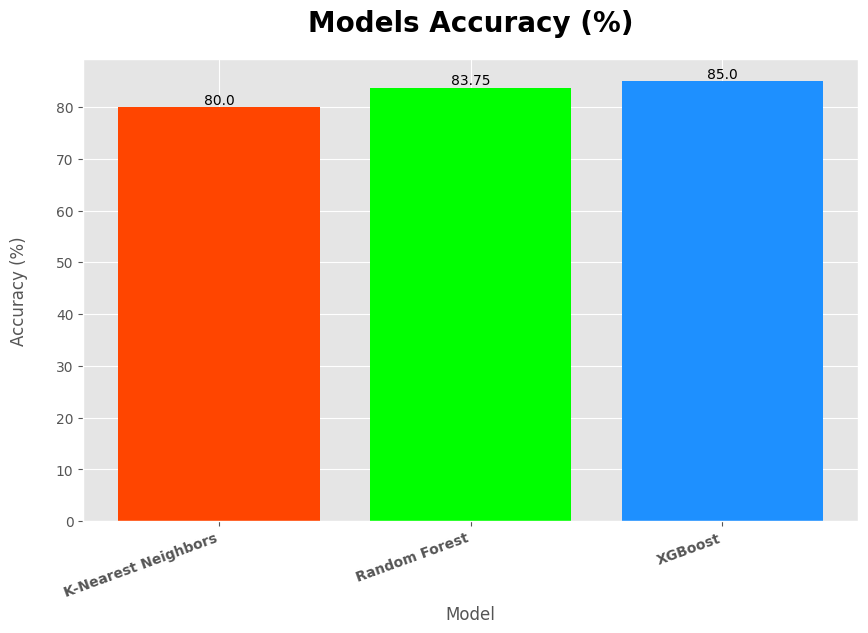

In [28]:
# Remove ' Classifier' for each model's title
models_title = []
for title in models['title']:
  models_title.append(title[:-11])

models_title[0] = "K-Nearest Neighbors"

# Visualize Each model's accuracy for comparation
plt.figure(figsize=(10, 6))

bars = plt.bar(models_title, models['accuracy'], color=['orangered', 'lime', 'dodgerblue'])
plt.title("Models Accuracy (%)", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Model")
plt.ylabel("Accuracy (%)", labelpad=20)
plt.xticks(weight='bold', rotation=20, ha='right')

for bar in bars:
  y_val = bar.get_height()
  plt.text((bar.get_x() + (bar.get_width() / 2)), y_val, round(y_val, 2), ha='center', va='bottom')

plt.show()

In [29]:
import pickle

# (OPTIONAL)
# Export each model as pickle file for future use
export_model = {
  'title': ["knn", "rf", "xgb"],
  'model': [model_knn, model_rf, model_xgb]
}

for i in range(len(export_model['title'])):
  with open("app/models/model_{}.pkl".format(export_model['title'][i]), 'wb') as file:
    pickle.dump(export_model['model'][i], file)

with open("app/models/models.txt", "w") as file:
  for i in range(len(models['title'])):
    file.write(f"{models['title'][i]},model_{export_model['title'][i]}.pkl\n")

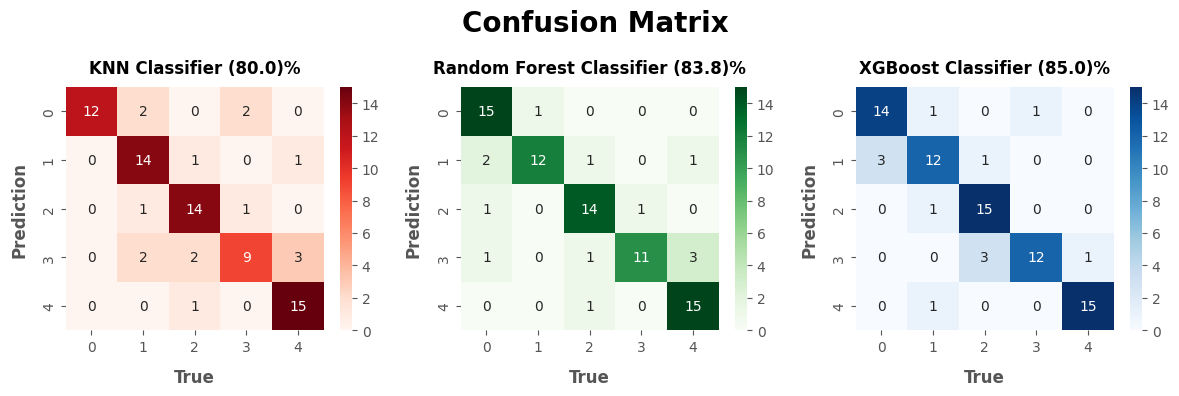

In [30]:
from sklearn.metrics import confusion_matrix

# Show confusion matrix for each model's prediction
cmaps = ["Reds", "Greens", "Blues"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
fig.suptitle("Confusion Matrix", fontsize=20, fontweight='bold')

for i in range(len(models['title'])):
  sns.heatmap(confusion_matrix(y_test, models['y_pred'][i]), annot=True, fmt='d', cmap=cmaps[i], ax=axes[i])
  axes[i].set_title("{} ({:.1f})%".format(models['title'][i], models['accuracy'][i]), fontsize=12, fontweight='bold', pad=10)
  axes[i].set_xlabel("True", fontsize=12, fontweight='bold', labelpad=10)
  axes[i].set_ylabel("Prediction", fontsize=12, fontweight='bold', labelpad=10)

plt.tight_layout()
plt.show()

In [31]:
# Show the classification report of the best model
best_model_index = models['accuracy'].index(max(models['accuracy']))

print("Best Model's Classification Report")
print("\nName: {}".format(models['title'][best_model_index]))
print("Accuracy: {}%\n".format(models['accuracy'][best_model_index]))
print(classification_report(y_test, models['y_pred'][best_model_index]))

Best Model's Classification Report

Name: XGBoost Classifier
Accuracy: 85.0%

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.80      0.75      0.77        16
           2       0.79      0.94      0.86        16
           3       0.92      0.75      0.83        16
           4       0.94      0.94      0.94        16

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80

